# RCCLR circuit closed loop

### author: Juan M. Acevedo-Valle
### date: 10/Abr/2018

In [2]:
%matplotlib inline
import control
import numpy as np
import pylab as plt

import matplotlib
matplotlib.rcParams.update({'font.size': 18})
matplotlib.rcParams.update({'lines.linewidth': 3})
matplotlib.rcParams['figure.figsize'] = (11.0, 6.)

In [3]:
R_1 = 1
C_1 = 1
C_2 = 1
L_1 = 1
    
def LCCR_response(ref, R_2, K_s, T):
    A = np.array([[-1/(R_1*C_1),0,-1/C_1],[0,0,1/C_2],[1/L_1,-1/L_1,-R_2/L_1]])
    B = np.array([[1/(R_1*C_1)],[0],[0]])
    C = np.eye(3,3)
    D = 0*B
    
    ss = control.ss(A,B,C,D)
    
    SYS_s = control.ss2tf(ss)
    P_s = control.tf(SYS_s.num[1][0],SYS_s.den[1][0])  
#     print(P_s)
    
    G_cl = control.feedback(control.series(K_s,P_s),1)
    print(G_cl)
    T, y, foo = control.forced_response(G_cl,T,ref)
    
    plt.plot(T,y)
    plt.grid(True)


          1
---------------------
s^3 + 2 s^2 + 3 s + 2



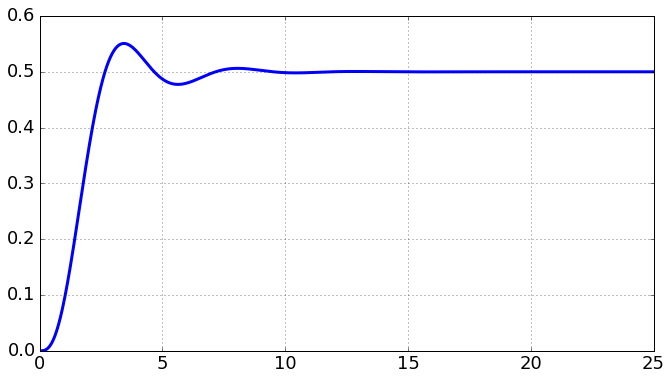

In [4]:
T = np.linspace(0,25,1000)
R_2 = 1
ref = np.array([0.]+[1.]*999)

K= 1 #-0.99
K_s = control.tf([0, 0, K],[1])
# K_s = control.tf([1, 1, 1],[1])

LCCR_response(ref,R_2,K_s,T)

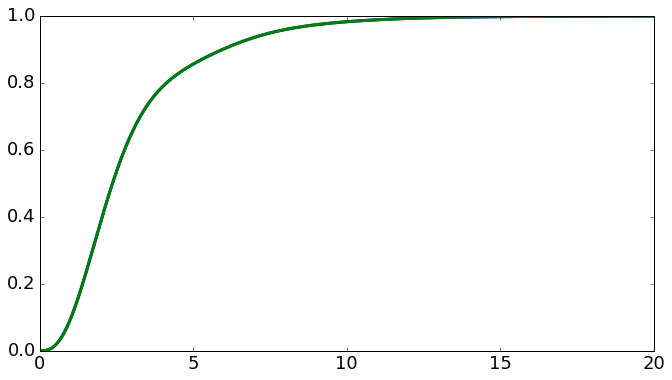

In [5]:
from scipy.integrate import odeint

def RCCLR(x, t, u):
    R_1 = 1
    C_1 = 1
    C_2 = 1
    L_1 = 1
    R_2 = 1
    
    dx1 = -1/(R_1*C_1)*x[0] -1/C_1*x[2] + 1/(R_1*C_1)*u
    dx2 = 1/C_2*x[2]
    dx3 = 1/L_1*x[0] -1/L_1*x[1] -R_2/L_1*x[2]
 
    return [dx1, dx2, dx3]

x0 = [0,0,0]
T = np.linspace(0,20,1000)
u = 1
x = odeint(RCCLR, x0, T, args=(1,))

P_s =  control.tf([1],[1,2,3,1])

y_step, T = control.step(P_s,T)

plt.plot(T,x[:,1])
plt.plot(T,y_step)

In [ ]:
def RCCLR(y, t, u):
    t_R2 = np.linspace(0,60,1000)
    R_2 = [0.5]*200 + [1.]*200 + [1.3]*200 + [1.6]*200 + [2.]*200
    dy1 = y[0]
    dy2 = y[1]
    dy3 = y[2]

    return [dy1, dy2, dy3]

T = 


R_1 = 1
C_1 = 1
C_2 = 1
L_1 = 1
A = np.array([[-1/(R_1*C_1),0,-1/C_1],[0,0,1/C_2],[1/L_1,-1/L_1,-R_2/L_1]])
B = np.array([[1/(R_1*C_1)],[0],[0]])
C = np.eye(3,3)
D = 0*B
    